In [1]:
# Syrel Miguel A. Capule | BSCS - III

# Loading an audio file

import warnings
warnings.filterwarnings('ignore')

import librosa
audio_path = 'C:/Users/Miguel Capule/Downloads/test.wav'
x , sr = librosa.load(audio_path)

In [2]:
# Play audio

import IPython.display as ipd
ipd.Audio(audio_path)

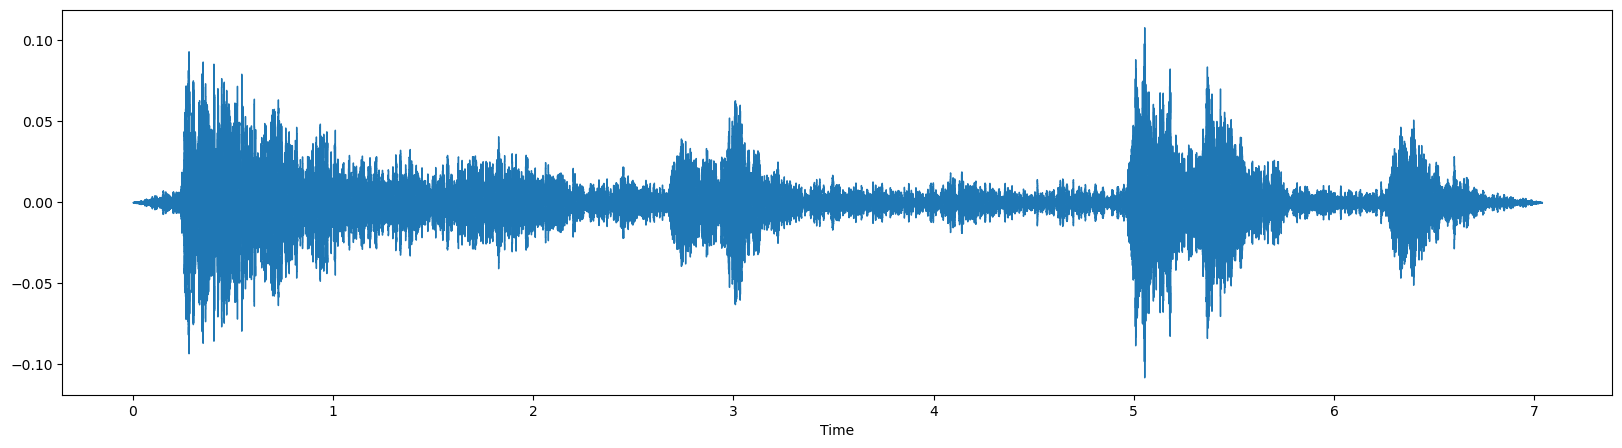

In [3]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)

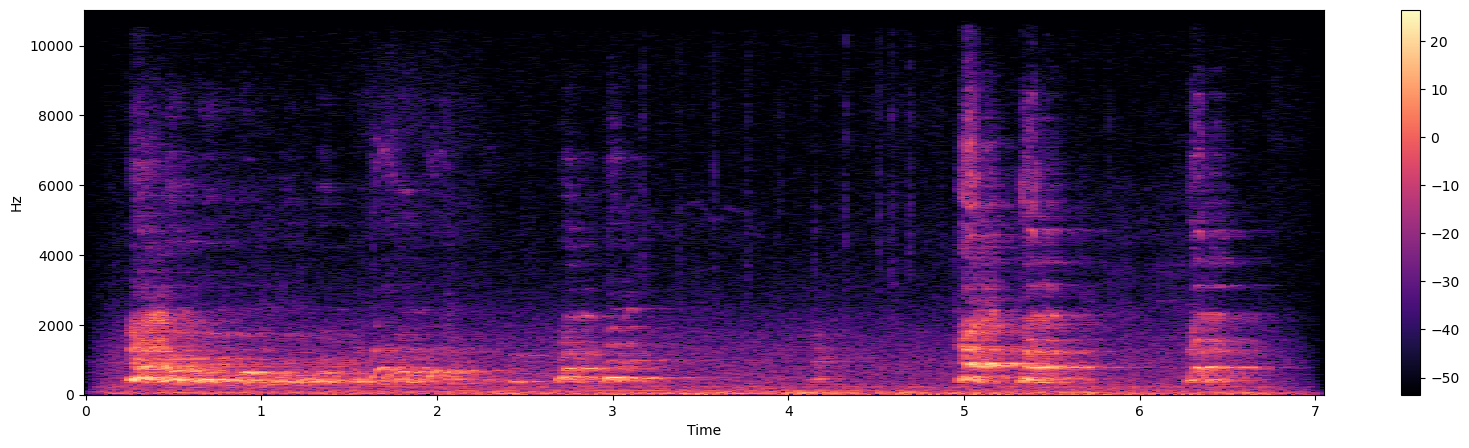

In [4]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

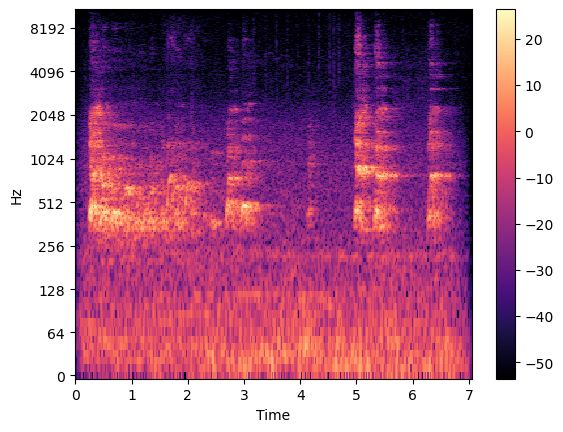

In [5]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [6]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz

In [7]:
ipd.Audio(x, rate=sr) # load a NumPy array


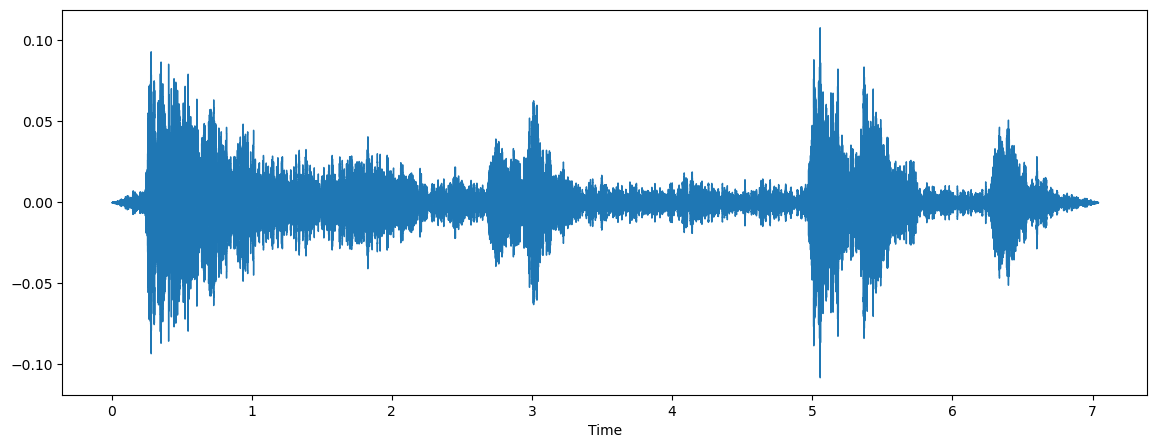

In [8]:
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))

#librosa.display.waveplot(x, sr=sr)

# https://stackoverflow.com/questions/43533023/librosa-display-waveplotnp-arrayf-sr-22050-attributeerror-module-obje
librosa.display.waveshow(x, sr=sr)

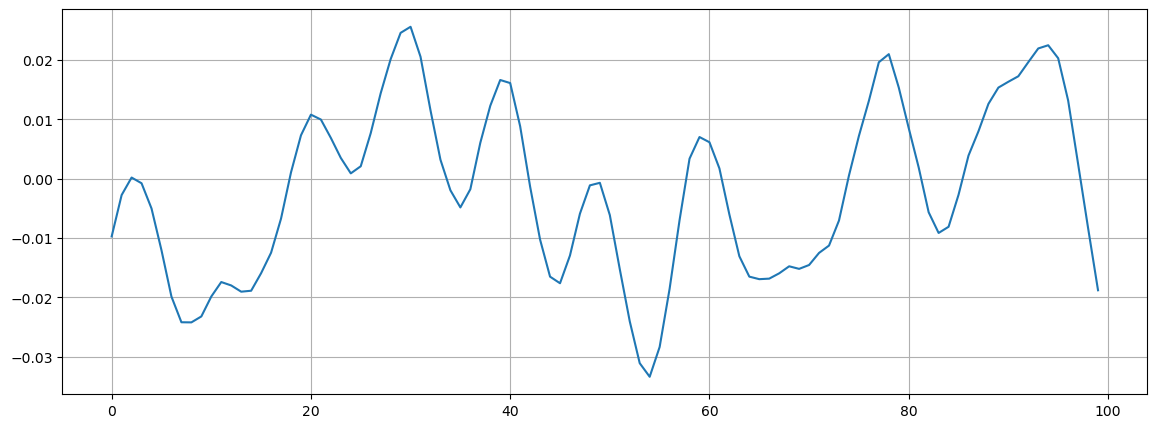

In [9]:
# Zooming in
n0 = 9000
n1 = 9100

plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [10]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings)) # 6, via vertical lines

12


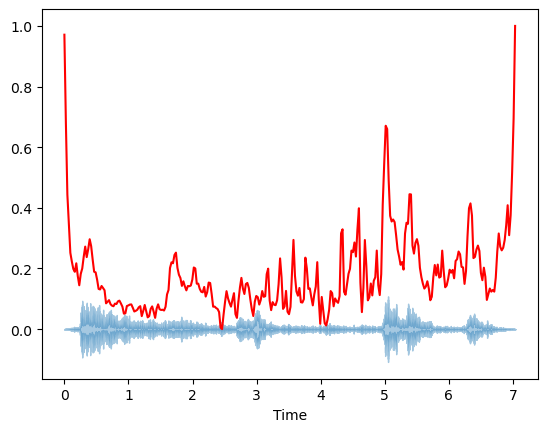

In [11]:
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt

# Your audio processing code here
# Assuming x and sr are already defined

# Compute the spectral centroid
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def my_normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

# Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)

# Plot the spectral centroid in red
plt.plot(t, my_normalize(spectral_centroids), color='r')

# Display the plot
plt.show()